In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/DATA7703/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DATA7703
DATA7703-Week3.gslides  penguins_size.csv
DATA7703-Week4.gslides  Prac4-DATA7703


In [ ]:
import pandas as pd
from sklearn import preprocessing
data_test=pd.read_csv('penguins_size.csv').dropna()

X=data_test.iloc[:,4:6].values
y=data_test['species']
print(set(y))
le = preprocessing.LabelEncoder()
le.fit(y)
le.classes_
y_labels= le.transform(y)

data_test

{'Gentoo', 'Adelie', 'Chinstrap'}


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1235)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(....)
X_test = scaler.transform(...)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train)
kmeans.labels_
predictions=kmeans.predict(X_test)
cluster_centers=kmeans.cluster_centers_
predictions
cluster_centers

array([[ 192.33802817, 3747.88732394],
       [ 212.81081081, 4887.16216216],
       [ 221.77777778, 5611.11111111],
       [ 188.04166667, 3229.16666667],
       [ 203.36585366, 4351.82926829]])

In [ ]:
print(X[0])

[ 181. 3750.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


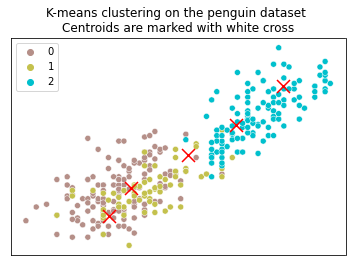

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(1)
# plt.clf()

# plt.scatter(X[:,0], X[:,1], marker="x")
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_

color_palette=sns.color_palette(["#b58f88","#c4c14d","#00c0cd"])
cmap=ListedColormap(color_palette.as_hex())

sns.scatterplot(X[:,0], X[:,1], hue=y_labels, palette=cmap)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
color_palette=sns.color_palette(["#b58f88","#c4c14d","#00c0cd"])
cmap=ListedColormap(color_palette.as_hex())
plt.title(
    "K-means clustering on the penguin dataset \n"
    "Centroids are marked with white cross"
)
# plt.xlim(np.amin(X), np.amax(X))
# plt.ylim(np.amin(y), np.amax(y))
plt.xticks(())
plt.yticks(())
plt.show()
